In [2]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [3]:
with1=cv2.imread('data/train/with_mask/242-with-mask.jpg')
with1 = cv2.cvtColor(with1,cv2.COLOR_BGR2RGB)

In [4]:
with1.shape

(428, 320, 3)

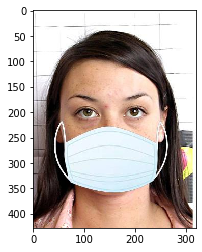

In [5]:
plt.imshow(with1)

In [6]:
without1=cv2.imread('data/train/without_mask/242.jpg')
without1 = cv2.cvtColor(without1,cv2.COLOR_BGR2RGB)

In [7]:
without1.shape

(428, 320, 3)

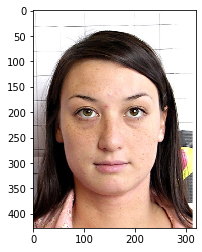

In [8]:
plt.imshow(without1)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [10]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

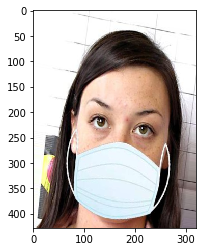

In [11]:
plt.imshow(image_gen.random_transform(with1))

In [12]:
image_gen.flow_from_directory('data/train')

Found 961 images belonging to 2 classes.


In [13]:
image_gen.flow_from_directory('data/test')

Found 415 images belonging to 2 classes.


In [14]:
image_shape = (150,150,3)

In [15]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [18]:
batch_size = 10

train_image_gen = image_gen.flow_from_directory('data/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 961 images belonging to 2 classes.


In [19]:
test_image_gen = image_gen.flow_from_directory('data/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 415 images belonging to 2 classes.


In [20]:
train_image_gen.class_indices

{'with_mask': 0, 'without_mask': 1}

In [48]:
test_image_gen.class_indices

{'with_mask': 0, 'without_mask': 1}

In [21]:
len(train_image_gen.labels)

961

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
results = model.fit_generator(train_image_gen,epochs=30,
                              validation_data=test_image_gen)

Epoch 1/30
97/97 [==============================] - 43s 448ms/step - loss: 0.0807 - accuracy: 0.9709 - val_loss: 0.0022 - val_accuracy: 0.9687
Epoch 2/30
97/97 [==============================] - 49s 503ms/step - loss: 0.0955 - accuracy: 0.9677 - val_loss: 0.5151 - val_accuracy: 0.9205
Epoch 3/30
97/97 [==============================] - 40s 414ms/step - loss: 0.1337 - accuracy: 0.9584 - val_loss: 0.0024 - val_accuracy: 0.9783
Epoch 4/30
97/97 [==============================] - 39s 402ms/step - loss: 0.0774 - accuracy: 0.9719 - val_loss: 0.0604 - val_accuracy: 0.9373
Epoch 5/30
97/97 [==============================] - 41s 424ms/step - loss: 0.0771 - accuracy: 0.9771 - val_loss: 0.0058 - val_accuracy: 0.9831
Epoch 6/30
97/97 [==============================] - 40s 408ms/step - loss: 0.1137 - accuracy: 0.9605 - val_loss: 0.0059 - val_accuracy: 0.9687
Epoch 7/30
97/97 [==============================] - 40s 410ms/step - loss: 0.0713 - accuracy: 0.9750 - val_loss: 1.2659e-04 - val_accuracy: 0.

In [50]:
results.history

{'val_loss': [0.0021611221600323915,
  0.5150782465934753,
  0.0024136342108249664,
  0.06035153195261955,
  0.00576086575165391,
  0.0058780391700565815,
  0.00012658507330343127,
  0.0004183502751402557,
  6.62367237964645e-05,
  0.0008401254890486598,
  0.0017233766848221421,
  0.8970890045166016,
  5.097367102280259e-05,
  0.0043778689578175545,
  2.1789690435980447e-05,
  0.0004336731508374214,
  0.0029358554165810347,
  0.001633870997466147,
  0.015853984281420708,
  0.004161779303103685,
  0.0002540401474107057,
  0.0038571699988096952,
  0.0017787324031814933,
  0.025797799229621887,
  0.06755150854587555,
  3.8065409171395004e-05,
  4.459976116777398e-05,
  0.23090407252311707,
  1.1775014172599185e-05,
  0.00014995806850492954],
 'val_accuracy': [0.9686747193336487,
  0.9204819202423096,
  0.9783132672309875,
  0.9373493790626526,
  0.983132541179657,
  0.9686747193336487,
  0.9807229042053223,
  0.9686747193336487,
  0.9903614521026611,
  0.9783132672309875,
  0.992771089076

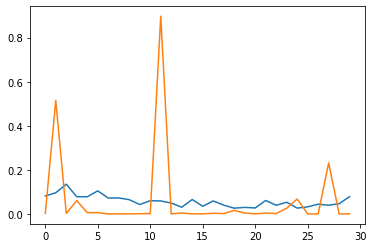

In [51]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])


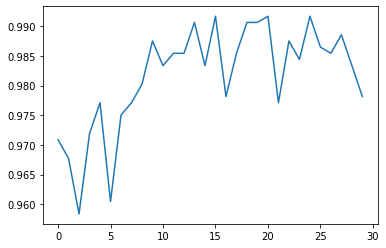

In [52]:
plt.plot(results.history['accuracy'])

In [53]:
from keras.preprocessing import image

dog_file = '221.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [54]:
model.predict_classes(dog_img)

array([[1]])

In [67]:
model.save('face_mask_detector.h5')

In [55]:
face_cascade = cv2.CascadeClassifier('C:/Users/Shivam Shandilya/Desktop/OPEN_CV COURSE/original (2)/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [56]:
def detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

In [57]:
import numpy as np

In [68]:
labels_dict={0:'with_mask',1:'without_mask'}
color_dict={1:(0,0,255),0:(0,255,0)}

cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
    frame=cv2.flip(frame,1,1)
    face_rects = face_cascade.detectMultiScale(frame.copy(),scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        face_img = frame[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        
        
        result=model.predict_classes(reshaped)
        
        
        label=result[0][0]
      
        cv2.rectangle(frame,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(frame,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(frame,labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()